In [93]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import teams
from nba_api.stats.static import players
import json
import requests
import urllib.request
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import  OffsetImage

## Load Data 

In order to make our API request, we need player ID and team ID number to retrieve shot stats. Luckily, we can take advantage of another Github [repo](https://github.com/bttmly/nba). We can use the two JSON files via Python to load them into arrays of dictionary objects. 

In [5]:
# Load teams file
teams = json.loads(requests.get("https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json").text)

# Get team ID based on team name
def get_team_id(team):
  for team in teams:
    if team['teamName'] == team:
      return team['teamId']
  return -1

## Helper Functions

Now that we have all the player and team data loaded, we can create functions that take an input of a team name and a player’s name, and return their respective ID numbers. In both cases, if a player or team name cannot be found, the functions return -1:

In [8]:
# Load players file
players = json.loads(requests.get("https://raw.githubusercontent.com/bttmly/nba/master/data/players.json").text)


# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [27]:
# Get the team ID number for the Knicks
get_team_id('Golden State Warriors')


# Get the player ID number for Klay Thompson
get_player_id('Kevin', 'Durant')


201142

# Retrieve the JSON: Using the nba_api package

First we set the URL https://stats.nba.com/stats/shotchartdetail as our base URL. shotchartdetail is the endpoint where we can retrieve shot location data.

Next we set the request headers via the headers dictionary. Without the correct settings, stats.nba.com will forcibly close the connection. 


We then need to set the URL parameters via the parameters dictonary. There are more parameter options than the ones listed here, but these are the ones that are specified as being ‘required’.


The nba_api package provides additional functions to look up a player_id (please refer to their documentation on Github). Another way to find a player_id is to visit the relevant player’s page on stats.nba.com and check the URL.

The documentation for the NBA API (Credit to Swar Patel) is linked [here](https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md)— which outlines the endpoints with data that is available for querying using the API. This tutorial only covers 1 specific endpoint (/ShotChartDetail) within the API.

Would also like to send a shout-out to [Daniel Teo at DataVizardry](https://datavizardry.com/2020/01/28/nba-shot-charts-part-1/) for his tutorial on using the NBA API

# Team Comparison 

In [ ]:
from nba_api.stats.endpoints import leaguedashteamstats
import requests
import json
import pandas as pd

response = leaguedashteamstats.LeagueDashTeamStats(
    team_id_nullable='0',
    league_id_nullable='00',
    season= '2021-22',
    season_type_all_star='Regular Season',
    headers={'Accept': 'application/json, text/plain, */*',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'en-US,en;q=0.9',
'Connection': 'keep-alive',
'Host': 'stats.nba.com',
'Origin': 'https://www.nba.com',
'Referer': 'https://www.nba.com/',
'sec-ch-ua': '"Google Chrome";v="87", "\"Not;A\\Brand";v="99", "Chromium";v="87"',
'sec-ch-ua-mobile': '?1',
'Sec-Fetch-Dest': 'empty',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Site': 'same-site',
'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36',
'x-nba-stats-origin': 'stats',
'x-nba-stats-token': 'true'})


df = response.get_data_frames()[0]
df

In [ ]:
df.to_csv("./Files/teams_2021-22.csv")

# Get Players and Teams

In [1]:
#Get Players
player_dict = players.get_players()

#Get Teams
teams = teams.get_teams()


In [42]:
player_dict

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [43]:
teams

[{'teamId': 1610612737,
  'abbreviation': 'ATL',
  'teamName': 'Atlanta Hawks',
  'simpleName': 'Hawks',
  'location': 'Atlanta'},
 {'teamId': 1610612738,
  'abbreviation': 'BOS',
  'teamName': 'Boston Celtics',
  'simpleName': 'Celtics',
  'location': 'Boston'},
 {'teamId': 1610612751,
  'abbreviation': 'BKN',
  'teamName': 'Brooklyn Nets',
  'simpleName': 'Nets',
  'location': 'Brooklyn'},
 {'teamId': 1610612766,
  'abbreviation': 'CHA',
  'teamName': 'Charlotte Hornets',
  'simpleName': 'Hornets',
  'location': 'Charlotte'},
 {'teamId': 1610612741,
  'abbreviation': 'CHI',
  'teamName': 'Chicago Bulls',
  'simpleName': 'Bulls',
  'location': 'Chicago'},
 {'teamId': 1610612739,
  'abbreviation': 'CLE',
  'teamName': 'Cleveland Cavaliers',
  'simpleName': 'Cavaliers',
  'location': 'Cleveland'},
 {'teamId': 1610612742,
  'abbreviation': 'DAL',
  'teamName': 'Dallas Mavericks',
  'simpleName': 'Mavericks',
  'location': 'Dallas'},
 {'teamId': 1610612743,
  'abbreviation': 'DEN',
  'tea

# Gathering the Data

The first step is to make use of the NBA API to gather the relevant data you want to use. This can be done through the NBA API itself, by simply entering in the “player_id” and “team_id” for whatever player you are looking for.

We used the get_players() and get_teams() functions to access player id and team id, respectively.

In [21]:
#Fetch Curry Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201939, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df = shot_detail.get_data_frames()[0]

In [19]:
#Fetch Klay Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 202691, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_klay = shot_detail.get_data_frames()[0]


In [22]:
#Fetch Derrick Rose Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201565, 
              team_id= 1610612752, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_drose_ny = shot_detail.get_data_frames()[0]


In [25]:
#Fetch MVP Derrick Rose Shots

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201565, 
              team_id= 1610612741, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_drose_bulls = shot_detail.get_data_frames()[0]

In [33]:
#Fetch GSW Durant 

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201142, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_durant_gsw = shot_detail.get_data_frames()[0]

In [34]:
#Fetch OKC Durant 

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201142, 
              team_id= 1610612760, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season')
shot_df_durant_okc = shot_detail.get_data_frames()[0]

In [22]:
#Stephen Curry Stats
shot_df_curry = shot_df
shot_df_curry.to_csv("./Files/curry_historical_shots.csv")

In [20]:
#Klay Thompson Stats
shot_df_klay.to_csv("./Files/klay_historical_shots.csv")

In [24]:
#D Rose Knicks
shot_df_drose.to_csv("./Files/ny_drose_historical_shots.csv")

In [26]:
#MVP D Rose - Chicago Bulls

shot_df_drose_bulls.to_csv("./Files//bulls_drose_historical_shots.csv")

In [35]:
shot_df_durant_okc.to_csv("./Files/okc_durant_historical_shots.csv")

In [40]:
shot_df_durant_gsw.to_csv("./Files/gsw_durant_historical_shots.csv")

In [5]:
#Fetch Curry Playoffs

shot_detail = shotchartdetail.ShotChartDetail(player_id= 201939, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs')
shot_df_curry_playoffs = shot_detail.get_data_frames()[0]

In [9]:
# shot_df_curry_playoffs.to_csv("./Files/gsw_curry_playoffs_shots.csv")


In [11]:
#Fetch Klay Playoffs
shot_detail = shotchartdetail.ShotChartDetail(player_id= 202691, 
              team_id= 1610612744, context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs')
shot_df_klay_playoffs = shot_detail.get_data_frames()[0]
shot_df_klay_playoffs.to_csv("./Files/gsw_klay_playoffs_shots.csv")

# Create a basketball court with Matplotlib

To create our shot chart, we will use a plot called hexbin which is built-in with matplotlib. This function will bin all the shots based on location into hexagonally-shaped bins.  and then color them based on the number of items in each bin.

The basketball court dimensions can be found [here](http://sportsknowhow.com/basketball/dimensions/nba-basketball-court-dimensions.html). Credit goes to [Savvas Tjortjoglou](http://savvastjortjoglou.com/nba-shot-sharts.html) for inspirations for the creation of this basketball court.


In [14]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

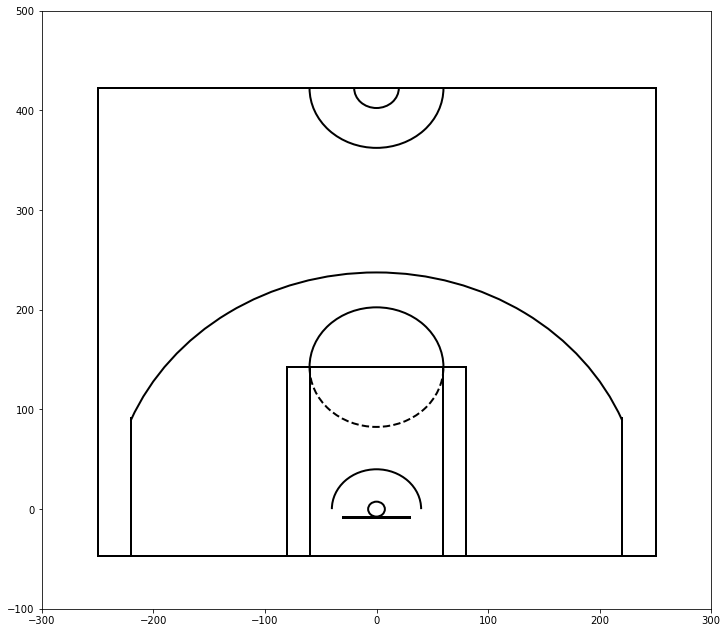

In [15]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Generate Shot Charts

In [26]:
shot_df_curry.dtypes

GRID_TYPE              object
GAME_ID                object
GAME_EVENT_ID           int64
PLAYER_ID               int64
PLAYER_NAME            object
TEAM_ID                 int64
TEAM_NAME              object
PERIOD                  int64
MINUTES_REMAINING       int64
SECONDS_REMAINING       int64
EVENT_TYPE             object
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
SHOT_ATTEMPTED_FLAG     int64
SHOT_MADE_FLAG          int64
GAME_DATE              object
HTM                    object
VTM                    object
dtype: object

In [31]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
shot_df_curry["GAME_DATE"] =  pd.to_datetime(shot_df_curry["GAME_DATE"], format="%Y/%m/%d")
shot_df_curry.tail()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
14512,Shot Chart Detail,0022101025,604,201939,Stephen Curry,1610612744,Golden State Warriors,4,2,33,...,Center(C),24+ ft.,32,86,311,1,0,2022-03-14,GSW,WAS
14513,Shot Chart Detail,0022101042,13,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,1,...,Left Side Center(LC),24+ ft.,26,-210,155,1,1,2022-03-16,GSW,BOS
14514,Shot Chart Detail,0022101042,16,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,44,...,Left Side Center(LC),24+ ft.,24,-207,140,1,0,2022-03-16,GSW,BOS
14515,Shot Chart Detail,0022101042,81,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,25,...,Right Side Center(RC),24+ ft.,27,194,189,1,0,2022-03-16,GSW,BOS
14516,Shot Chart Detail,0022101042,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,26,...,Left Side Center(LC),24+ ft.,29,-165,250,1,0,2022-03-16,GSW,BOS


In [33]:
shot_df_curry.dtypes

GRID_TYPE                      object
GAME_ID                        object
GAME_EVENT_ID                   int64
PLAYER_ID                       int64
PLAYER_NAME                    object
TEAM_ID                         int64
TEAM_NAME                      object
PERIOD                          int64
MINUTES_REMAINING               int64
SECONDS_REMAINING               int64
EVENT_TYPE                     object
ACTION_TYPE                    object
SHOT_TYPE                      object
SHOT_ZONE_BASIC                object
SHOT_ZONE_AREA                 object
SHOT_ZONE_RANGE                object
SHOT_DISTANCE                   int64
LOC_X                           int64
LOC_Y                           int64
SHOT_ATTEMPTED_FLAG             int64
SHOT_MADE_FLAG                  int64
GAME_DATE              datetime64[ns]
HTM                            object
VTM                            object
dtype: object

In [84]:
#Use a boolean mask to extract games from the 2021-22 Regular Season
#greater than the start date and smaller than the end date
regular_season_mask =  (shot_df_curry['GAME_DATE'] <= "2022-04-10")

shot_df_curry_21_22_reg = shot_df_curry.loc[mask]

shot_df_curry_21_22_reg.reset_index()

,index,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,13293,Shot Chart Detail,0022100002,26,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,Left Side Center(LC),24+ ft.,28,-109,260,1,0,2021-10-19,LAL,GSW
1,13294,Shot Chart Detail,0022100002,34,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,Center(C),24+ ft.,26,48,257,1,0,2021-10-19,LAL,GSW
2,13295,Shot Chart Detail,0022100002,37,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,Left Side Center(LC),24+ ft.,25,-165,189,1,1,2021-10-19,LAL,GSW
3,13296,Shot Chart Detail,0022100002,75,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,...,Center(C),Less Than 8 ft.,1,-13,12,1,0,2021-10-19,LAL,GSW
4,13297,Shot Chart Detail,0022100002,130,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,...,Center(C),Less Than 8 ft.,2,-15,22,1,0,2021-10-19,LAL,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,14512,Shot Chart Detail,0022101025,604,201939,Stephen Curry,1610612744,Golden State Warriors,4,2,...,Center(C),24+ ft.,32,86,311,1,0,2022-03-14,GSW,WAS
1220,14513,Shot Chart Detail,0022101042,13,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,...,Left Side Center(LC),24+ ft.,26,-210,155,1,1,2022-03-16,GSW,BOS
1221,14514,Shot Chart Detail,0022101042,16,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,...,Left Side Center(LC),24+ ft.,24,-207,140,1,0,2022-03-16,GSW,BOS
1222,14515,Shot Chart Detail,0022101042,81,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,...,Right Side Center(RC),24+ ft.,27,194,189,1,0,2022-03-16,GSW,BOS


In [90]:
attempted_shots = shot_df_curry_21_22_reg.loc[shot_df_curry_21_22_reg["SHOT_MADE_FLAG"] == 0]
made_shots = shot_df_curry_21_22_reg[shot_df_curry_21_22_reg["SHOT_MADE_FLAG"] == 1]

len(made_shots)/len(attempted_shots)

0.7764876632801161

### Scale and Court Orientation is a bit off

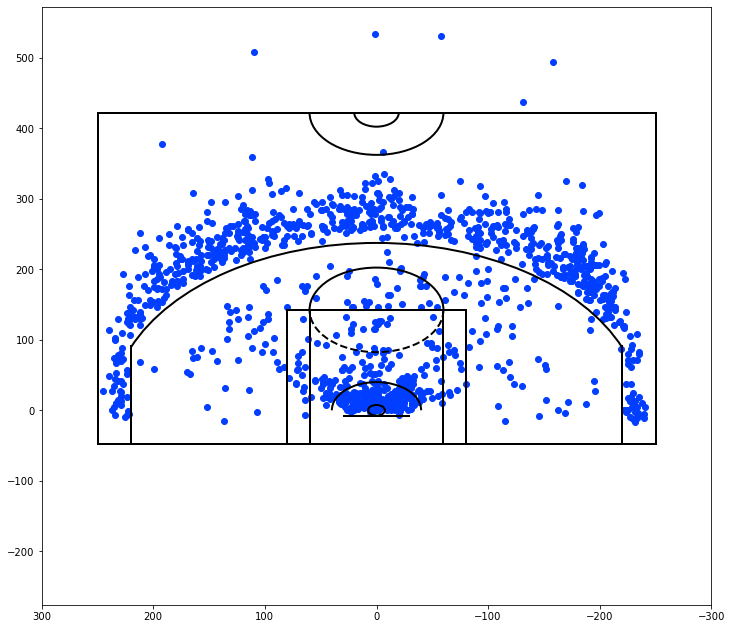

In [86]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df_curry_21_22_reg.LOC_X, shot_df_curry_21_22_reg.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

### We can flip the image so the hoop is at 12 o' clock position (as if we are facing the rim directly), which is how they are represented on the shot charts on stats.nba.com. We do this by settting descending y-values from the bottom to the top of the y-axis. When we do this we no longer need to adjust the x-values of our plot.

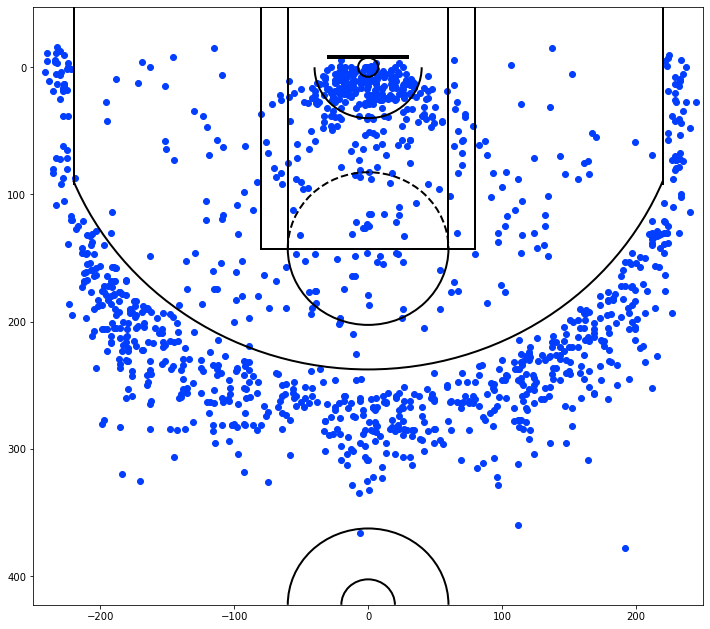

In [87]:

plt.figure(figsize=(12,11))
plt.scatter(shot_df_curry_21_22_reg.LOC_X, shot_df_curry_21_22_reg.LOC_Y)
draw_court()

# Adjust plot limits to just fit in half court
plt.xlim(-250,250)

# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)

# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

# Joints Plots with Seaborn

Seaborn is a Python data visualization library based on matplotlib.Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. 

A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y). 

It is very helpful to have univariate and bivariate plots together in one figure. This is because the univariate analysis focuses on one variable, it describes, summarizes and shows any patterns in your data and the bivariate analysis explores the relationship between two variables and also describes the strength of their relationship.


The function jointplot() in Seaborn library creates a scatter plot with two histograms at the top and right margins of the graph by default.

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


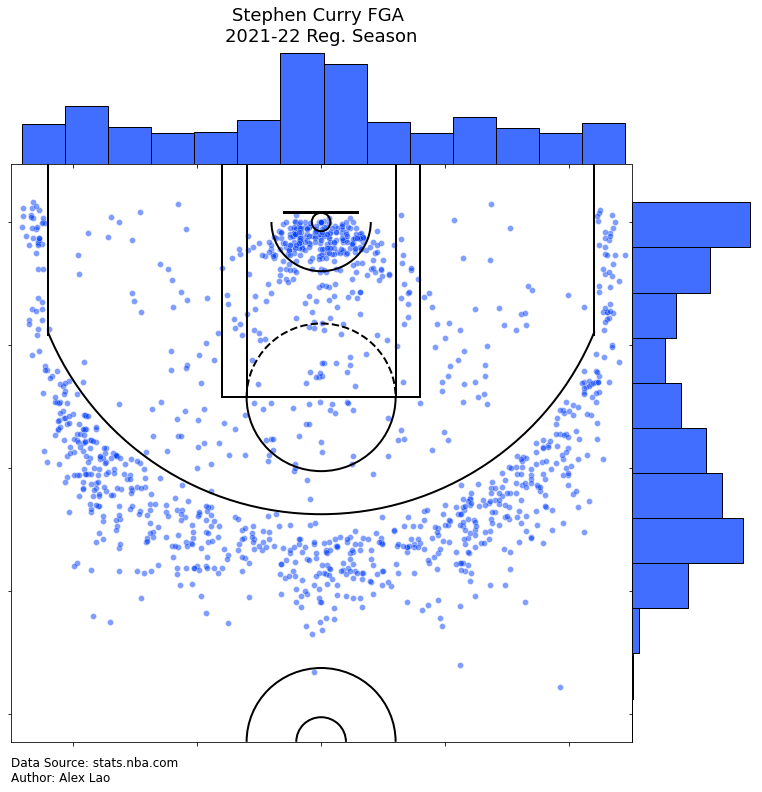

In [96]:
sns.set_palette("bright")
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df_curry_21_22_reg.LOC_X, shot_df_curry_21_22_reg.LOC_Y,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# The first plot is called ax_joint where we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Remove axis labels and tick marks
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(yticklabels=[])
ax.set(xticklabels=[])

# Add a title
ax.set_title('Stephen Curry FGA \n2021-22 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,455,'Data Source: stats.nba.com'
        '\nAuthor: Alex Lao',
        fontsize=12)

plt.show()


# Append Player's Image

We can also scrape Steph Curry's Image from stats.nba.com to place on our plot.
For this, we can use the urlretrieve from url.requests

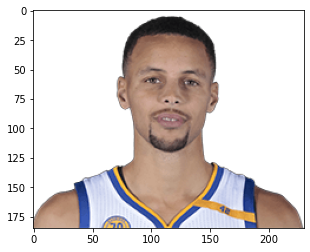

In [92]:
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201939.png",
                                "201939.png")

# urlretrieve returns a tuple with our image as the first 
# element and imread reads in the image as a 
# mutlidimensional numpy array so matplotlib can plot it
curry_pic = plt.imread(pic[0])

# plot the image
plt.imshow(curry_pic)
plt.show()

We will import OffsetImage from matplotlib library to place the image at the upper right corner of the plot. 

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


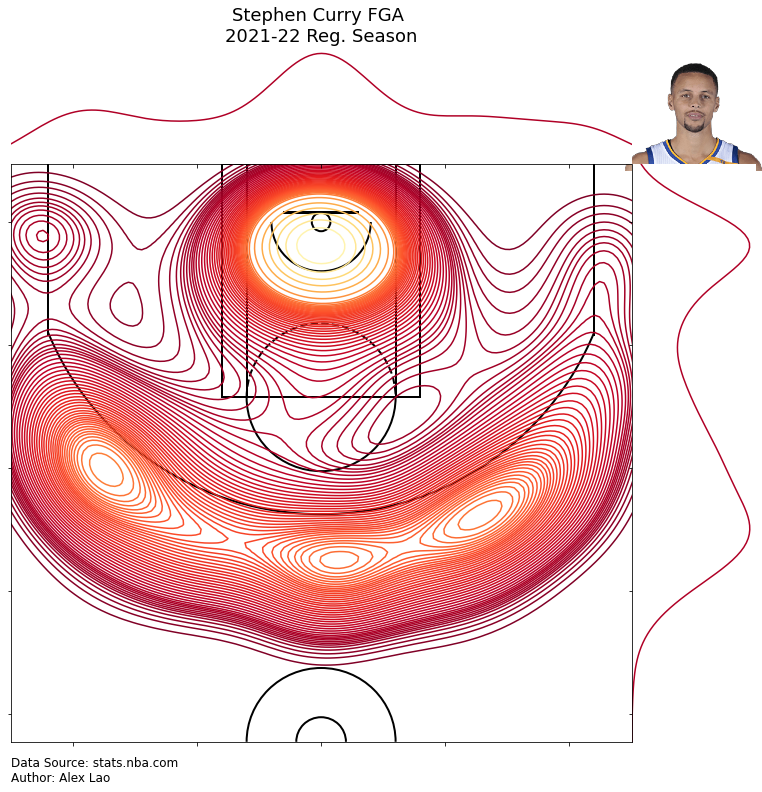

In [110]:
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r  

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df_curry_21_22_reg.LOC_X, shot_df_curry_21_22_reg.LOC_Y,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(yticklabels=[])
ax.set(xticklabels=[])

# Add a title
ax.set_title('Stephen Curry FGA \n2021-22 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,455,'Data Source: stats.nba.com'
        '\nAuthor: Alex Lao',
        fontsize=12)

# Add Curry's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(curry_pic, zoom=0.6)

# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be

img.set_offset((625,621))

# add the image
ax.add_artist(img)

plt.show()

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


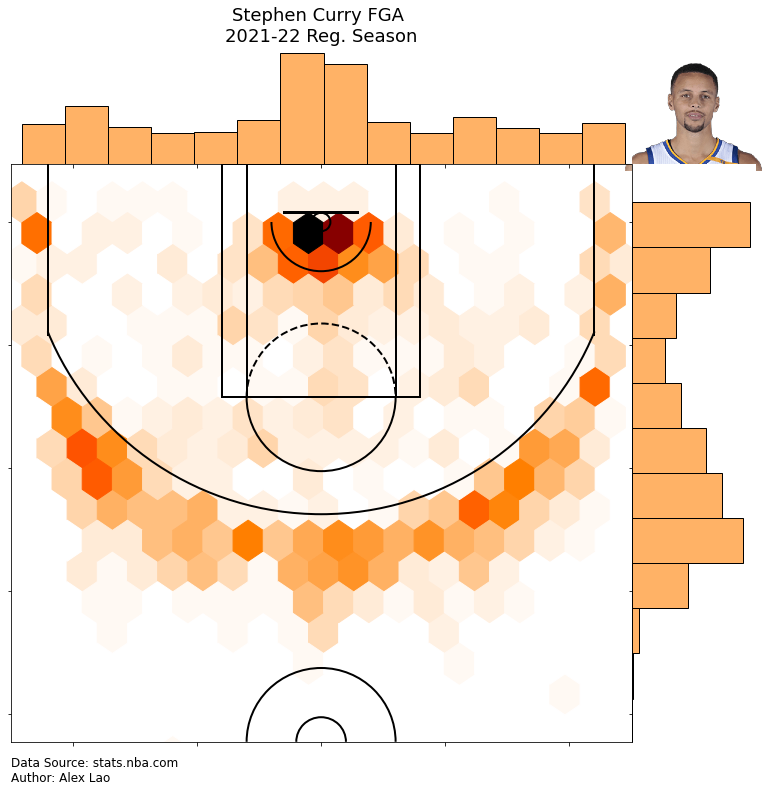

In [112]:
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.gist_heat_r 


joint_kws=dict(gridsize=20)


# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df_curry_21_22_reg.LOC_X, shot_df_curry_21_22_reg.LOC_Y,
                                 kind='hex', space=0, color=cmap(0.2),
                                 cmap=cmap, joint_kws = joint_kws)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(yticklabels=[])
ax.set(xticklabels=[])

# Add a title
ax.set_title('Stephen Curry FGA \n2021-22 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,455,'Data Source: stats.nba.com'
        '\nAuthor: Alex Lao',
        fontsize=12)

# Add Curry's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(curry_pic, zoom=0.6)

# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be

img.set_offset((625,621))

# add the image
ax.add_artist(img)

plt.show()